# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

import datetime

# Dataset Import

In [2]:
data_file = 'bmw_pricing_v2.csv'

In [3]:
original_df = pd.read_csv(data_file)

In [4]:
original_df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [6]:
original_df.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

# Preguntas sobre el dataset

In [7]:
# Listado de vehículos agrupados por modelo y tipo de gasolina
original_df.groupby(['modelo', 'tipo_gasolina'])[['precio']].mean()

precio
modelo         tipo_gasolina              
 Active Tourer diesel         19000.000000
114            diesel         10460.000000
               petrol         12700.000000
116            diesel          9757.522124
               petrol          7805.263158
...                                    ...
X6 M           petrol         82400.000000
Z4             petrol          9500.000000
i3             electro        20966.666667
               hybrid_petrol  21266.666667
i8             hybrid_petrol  95200.000000

[109 rows x 1 columns]

In [8]:
# Cantidad de vehículos con potencia superior a 150, convertible y con volante regulable
len(original_df[(original_df['potencia'] > 150) & (original_df['tipo_coche'] == 'convertible') & (original_df['volante_regulable'] == True)])

9

In [9]:
# Fecha de registro superior a la fecha de venta?

serie_incremento_fechas = (pd.to_datetime(original_df['fecha_venta']) - pd.to_datetime(original_df['fecha_registro'])).dt.days
valores_negativos = serie_incremento_fechas[serie_incremento_fechas < 0].index
display(original_df.loc[valores_negativos, :])

# Precio medio de estos coches

print(f'Precio medio de estos coches: {original_df.loc[valores_negativos, "precio"].mean():.2f}')
print(f'Precio medio global: {original_df["precio"].mean():.2f}')

# Parece que son más baratos que la media global

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
42,BMW,330,142483.0,180.0,2012-01-01,diesel,blue,convertible,True,True,False,False,True,False,True,True,15800.0,2007-08-01
100,BMW,320,342768.0,135.0,2011-12-01,diesel,black,coupe,False,True,False,False,True,False,True,False,8200.0,2010-04-01
180,BMW,320,181052.0,120.0,2014-10-01,diesel,black,estate,False,True,False,False,False,False,True,True,11500.0,2009-04-01
256,BMW,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,False,False,False,False,False,True,False,8800.0,2008-06-01


Precio medio de estos coches: 11075.00
Precio medio global: 15831.92


In [10]:
# Precio medio de los vehículos con aire acondicionad
round(original_df[original_df['aire_acondicionado'] == True]['precio'].mean(), 2)

# Parece que son un poco más caros respecto la media global

16998.12

In [11]:
# Precio medio por color
original_df.groupby(by = ['color'])[['precio']].agg(['mean', 'count']).sort_values(by = ('precio', 'mean'), ascending = False)

# El color verde es significativamente más barato que el resto, y no se tiene una sola muestra (no parece ser un outlier)
# El color naranja es el más caro (hay pocas muestras) seguido del blanco.

precio      
                mean count
color                     
orange  18866.666667     6
white   17314.365672   536
red     16568.627451    51
black   16178.479460  1631
beige   15817.073171    41
grey    15619.914530  1170
brown   15367.741935   341
blue    15137.784091   704
silver  14826.299694   327
green    7200.000000    18

# Generación del modelo predictivo

## Data cleaning

### Target

In [12]:
# Se trabaja con el format_df para empezar a manipular el dataset
format_df = original_df.copy()

In [13]:
# El target es el precio. Es una variable numérica, así que es correcta tal y como está
target = 'precio'

In [14]:
# Se dropean los valores nulos del target, ya que són muy pocos (6 de 4843)
format_df[target].dropna(inplace = True)

### Columna Marca

In [15]:
# Como se trata de un dataset de BMW, se intuye que todos los coches serán de la misma marca
format_df['marca'].unique()

array(['BMW', nan], dtype=object)

In [16]:
# Se borra la columna porque, aunque tenga algunos nulos, todos los coches son de la misma marca
format_df.drop(columns = 'marca', inplace = True)

### Columnas de fecha

In [17]:
# Se detecta que las siguientes columnas contienen fechas:
glob_list_date = [column for column in format_df.columns if 'fecha' in column]

In [18]:
# Nulos de las columnas de fecha:
format_df[glob_list_date].isnull().sum()

fecha_registro    1
fecha_venta       1
dtype: int64

In [19]:
format_df[format_df[glob_list_date[0]].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
198,318,158853.0,100.0,NaN,diesel,black,estate,True,False,False,False,False,False,True,False,10900.0,2018-06-01


In [20]:
format_df[format_df[glob_list_date[1]].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
594,525,269290.0,120.0,2005-06-01,diesel,silver,estate,True,False,True,False,False,False,True,True,4200.0,NaN


Para rellenar los nulos, se decide calcular el tiempo medio entre la fecha de venta y la fecha de registro e imputar el valor que falta acorde al número calculado

In [21]:
# Se pasan las columnas a datetime
for column in glob_list_date:
    format_df[column] = pd.to_datetime(format_df[column])

In [22]:
# Se analiza la muestra del tiempo entre registro y venta
date_series = (format_df['fecha_venta'] - format_df['fecha_registro']).dt.days

In [23]:
# Parece que hay algún valor nulo y algún outlier
date_series.describe()

count     4841.000000
mean      1980.313365
std        932.297275
min      -2009.000000
25%       1489.000000
50%       1765.000000
75%       2130.000000
max      10258.000000
dtype: float64

<AxesSubplot:>

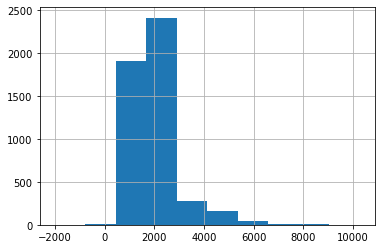

In [24]:
date_series.hist()

In [25]:
# Porcentaje de valores con fecha de registro posterior a la venta muy bajo
len(date_series[date_series < 0]) / len(date_series) * 100

0.08259343382201115

In [26]:
# Porcentaje de valores con fecha de venta superior a 8000 días a la fecha de registro
len(date_series[date_series > 8000]) / len(date_series) * 100

0.08259343382201115

In [27]:
# Se decide hacer la media con el 99% de los datos centrales
cuantil_bajo = np.nanquantile(date_series, 0.005)
cuantil_alto = np.nanquantile(date_series, 0.995)

In [28]:
# Se calcula la media y se pasa a valor entero redondeado
media_date_series = int(round(date_series[(date_series > cuantil_bajo) & (date_series < cuantil_alto)].mean(), 0))

In [29]:
media_date_series

1963

In [30]:
# Se rellenan los valores nulos
format_df['fecha_venta'].fillna(format_df['fecha_registro'] + datetime.timedelta(days = media_date_series), inplace = True)

In [31]:
format_df['fecha_registro'].fillna(format_df['fecha_venta'] - datetime.timedelta(days = media_date_series), inplace = True)

Como el modelo no acepta columnas datetime, se extrae toda la informació que se considera útil de las fechas en formato número. Concretamente:

In [32]:
# Se calcula el tiempo entre venta y registro, en días
format_df['dias_venta_registro'] = (format_df['fecha_venta'] - format_df['fecha_registro']).dt.days

In [33]:
# En la exploración inicial se detecta que los días de la fecha siempre son el primero de mes.
# La excepción es debido valor nulo imputado a posteriori
format_df['fecha_registro'].dt.day.value_counts()

1     4842
15       1
Name: fecha_registro, dtype: int64

In [34]:
format_df['fecha_venta'].dt.day.value_counts()

1     4842
16       1
Name: fecha_venta, dtype: int64

In [35]:
# Se extrae el año y el mes. El día no se extrae debido a que no hay varianza
for column in glob_list_date:
    format_df[column + '_año'] = format_df[column].dt.year
    format_df[column + '_mes'] = format_df[column].dt.month

In [36]:
format_df.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,dias_venta_registro,fecha_registro_año,fecha_registro_mes,fecha_venta_año,fecha_venta_mes
0,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,...,True,True,False,11300.0,2018-01-01,2161,2012,2,2018,1
1,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,...,True,True,True,69700.0,2018-02-01,671,2016,4,2018,2
2,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,...,False,True,False,10200.0,2018-02-01,2132,2012,4,2018,2
3,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,...,True,True,True,25100.0,2018-02-01,1311,2014,7,2018,2
4,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,...,True,True,True,33400.0,2018-04-01,1217,2014,12,2018,4


### Columnas numéricas

In [37]:
glob_num_list = list(format_df.describe().drop(columns = target).columns)

In [38]:
# Se tienen valores nulos en km y potencia
format_df[glob_num_list].isnull().sum()

km                     2
potencia               1
dias_venta_registro    0
fecha_registro_año     0
fecha_registro_mes     0
fecha_venta_año        0
fecha_venta_mes        0
dtype: int64

In [39]:
# Para los km, se hará una regresión lineal con el tiempo entre la fecha de registro y la fecha de venta.
# A nivel de negocio considero que estas variables tendrían que tener relación
format_df[['km', 'dias_venta_registro']].corr()

,km,dias_venta_registro
km,1.00000,0.49939
dias_venta_registro,0.49939,1.00000


In [40]:
# Se asigna el kilometraje del coche en función de los días entre venta y registro mediante un modelo lineal
train_sample_km = format_df[['dias_venta_registro', 'km']].dropna()
model_km = LinearRegression()
model_km.fit(np.array(train_sample_km['dias_venta_registro']).reshape(-1, 1), np.array(train_sample_km['km']))
null_values = format_df[format_df['km'].isnull()].index
format_df.loc[null_values, 'km'] = model_km.predict(np.array(format_df.loc[null_values, 'dias_venta_registro']).reshape(-1, 1))

In [41]:
# Se asigna la potencia restante del coche a partir del modelo y el tipo de gasolina
format_df[format_df['potencia'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,dias_venta_registro,fecha_registro_año,fecha_registro_mes,fecha_venta_año,fecha_venta_mes
181,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,...,False,True,True,18700.0,2018-03-01,1400,2014,5,2018,3


In [42]:
diesel_525 = format_df.groupby(['modelo', 'tipo_gasolina']).get_group(('525', 'diesel'))

In [43]:
diesel_525['potencia'].describe()

count    180.000000
mean     150.805556
std       15.661966
min       85.000000
25%      150.000000
50%      155.000000
75%      160.000000
max      160.000000
Name: potencia, dtype: float64

In [44]:
# Se decide asignar la potencia media de este subgrupo
format_df['potencia'].fillna(round(diesel_525['potencia'].mean(), 0), inplace = True)